# Homework 1
### INFO 5871-001, Fall 2019, Prof. Robin Burke

## Keke Wu

# Objective: Introduction to Jupyter notebook

Step 1: Insert a cell above the "Objective" cell containing markdown and put in it your name

Step 2: Run the following cell to import the `pandas` and the `pyplot` libraries.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Step 3: Run the following cell to load a data file containing tuition at US universities in 2016

In [2]:
univ = pd.read_csv('tuition-all-schools-2016.txt', sep='\t', header=0)

Step 4: Run the following cell to display the top 5 rows of the data

In [3]:
univ.head()

,InstutionName,City,Tuition,InstitutionType
0,Alabama A & M University,Normal,15229.0,Public
1,University of Alabama at Birmingham,Birmingham,14789.0,Public
2,Amridge University,Montgomery,12992.0,Private
3,University of Alabama in Huntsville,Huntsville,18596.0,Public
4,Alabama State University,Montgomery,11110.0,Public


Step 5: Display the `shape` of the data frame.

In [4]:
univ.shape

(7703, 4)

Step 6: For each column, indicate what type of variable it is (continuous, discrete, nominal, ordinal, free)


Answers here:
* InstutionName [sic]: _nominal_
* City: _nominal_
* Tuition: _discrete_
* InstitutionType: _nominal_

Step 7: Find the highest tuition
* Step 7a: Store the `Tuition` column (Series) in a variable `tuition`
* Step 7b: Apply the `max` operation to the tuition variable

In [5]:
tuition = univ['Tuition']
tuition.max()

89406.0

Step 8: Whoa! What school has tuition that high? Get the whole row corresponding to this tuition
* Step 8a: Store the index of the maximum tuition in a variable `maxrow`. Uses the `idxmax` operation.
* Step8b: Use `loc` to index into the original `univ` data frame

Note that what gets returned here is a "tuple" of column names and values. It isn't a dataframe with only one row.

In [6]:
maxrow = tuition.idxmax()
univ.loc[maxrow]

InstutionName      Aerosim Flight Academy
City                              Sanford
Tuition                             89406
InstitutionType                   Private
Name: 5108, dtype: object

[TODO] Step 9: Similar to Step 7, find the lowest tuition (`min` operation)

In [7]:
tuition.min()

-2434.0

Hmm, probably an error in the data, but we'll go with it.

[TODO] Step 10: Similar to Step 8, find the row corresponding to the lowest tuition. Create a new `minrow` variable.

In [8]:
minrow = tuition.idxmin()
univ.loc[minrow]

InstutionName      Northwest Technology Center-Fairview
City                                           Fairview
Tuition                                           -2434
InstitutionType                                  Public
Name: 4834, dtype: object

Step 11: Now we will clean up the data by keeping only the rows with tuition > 0
* Step 11a: Create a Series of True/False values corresponding to the tuition test
* Step 11b: Use the boolean values to index into the data frame and retain only the true columns
* Step 11c: Compute the difference in rows between the original `univ` data frame and the new `univ_clean` data frame. (This is the number of negative tuition institutions.)

In [9]:
not_negative_tuition = tuition > 0
not_negative_tuition.head()

0    True
1    True
2    True
3    True
4    True
Name: Tuition, dtype: bool

In [10]:
univ_clean = univ[not_negative_tuition]
univ_clean.shape

(6594, 4)

In [11]:
univ.shape[0] - univ_clean.shape[0]

1109

Step 12: Using the new `univ_clean` data, create a new data frame `univ_private` with only the Private schools using the boolean method from above.

In [12]:
institutiontype_private = univ_clean['InstitutionType']=='Private'
univ_private = univ_clean[institutiontype_private]
print(univ_private.shape)
univ_private.head()

(4687, 4)


,InstutionName,City,Tuition,InstitutionType
2,Amridge University,Montgomery,12992.0,Private
10,Birmingham Southern College,Birmingham,18728.0,Private
12,Concordia College Alabama,Selma,12329.0,Private
13,South University-Montgomery,Montgomery,23048.0,Private
16,Faulkner University,Montgomery,20240.0,Private


[TODO] Step 13: Do the same operation as Step 11, but for the Public schools

In [13]:
institutiontype_public = univ_clean['InstitutionType']=='Public'
univ_public = univ_clean[institutiontype_public]
print(univ_public.shape)
univ_public.head()

(1907, 4)


,InstutionName,City,Tuition,InstitutionType
0,Alabama A & M University,Normal,15229.0,Public
1,University of Alabama at Birmingham,Birmingham,14789.0,Public
3,University of Alabama in Huntsville,Huntsville,18596.0,Public
4,Alabama State University,Montgomery,11110.0,Public
5,The University of Alabama,Tuscaloosa,20787.0,Public


Step 14: Compute the average/mean and median values of tuition for each of the Public and Private groups. (4 answers)

In [14]:
univ_private['Tuition'].mean()

18234.190100277363

In [15]:
univ_private['Tuition'].median()

18257.0

[TODO]

In [16]:
univ_public['Tuition'].mean()

9647.132144729942

In [17]:
univ_public['Tuition'].median()

8756.0

{'whiskers': [<matplotlib.lines.Line2D at 0x11c65a828>,
 'caps': [<matplotlib.lines.Line2D at 0x11c65aeb8>,
 'boxes': [<matplotlib.lines.Line2D at 0x11c65a400>,
 'medians': [<matplotlib.lines.Line2D at 0x11c66c588>,
 'fliers': [<matplotlib.lines.Line2D at 0x11c66c8d0>,
 'means': []}

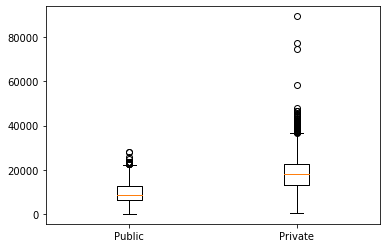

In [18]:
plt.boxplot([list(univ_public['Tuition']), list(univ_private['Tuition'])], labels=['Public', 'Private'])

Step 15: Display summary information about these tuition values in a boxplot. The code here is commented out so that it doesn't generate an error.

In [19]:
#plt.boxplot([list(univ_public['Tuition']), list(univ_private['Tuition'])], labels=['Public', 'Private'])

Step 16: We already know that the private schools have higher average tuition. What else does the plot show us about the difference between these two groups of schools?

[TODO] Answer: _There is a much greater variability for Private school tuitions as well as larger outliers._

Step 17: Identify one additional question that you would like to ask of this data set but for which the data is insufficient. 

[TODO] Answer: _What is the cost difference on average between in-state and out-of-state tuition?_

Step 18: What additional data would you need in order to answer the question you pose in Step 17.

[TODO] Answer: _A breakdown of the in-state and out-of-state tuitions for each of these schools._